# Scratch Artificial Neural Network

In [104]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
import sys
sys.dont_write_bytecode = True

# Import libraries
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Import custom modules
from ArtificialNeuralNetwork import ArtificialNeuralNetwork
from Layer import Layer, OutputLayer, InputLayer
from Function import ActivationFunction, LossFunction
from enums import InitializerType, RegularizationType

# Pipeline for testing MNIST dataset

In [106]:
input_size = 784
hidden_layers = 5
hidden_size = 128
output_size = 10
learning_rate = 0.01
param_1 = 0
param_2 = 0.5
batch_size = 64


In [107]:
# Load MNIST dataset using fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0
y = y.astype(int)


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
)

In [108]:
ann = ArtificialNeuralNetwork(
        123,
        InputLayer(input_size=input_size),
        Layer(
            weight_init=InitializerType.XAVIER,
            bias_init=InitializerType.ZERO,
            input_size=input_size,
            num_neurons=128,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.tanh,
            alpha=0.2,
            layer_name=f"Hidden Layer 0",
        ),
        *[Layer(
            weight_init=InitializerType.XAVIER,
            bias_init=InitializerType.ZERO,
            input_size=128,
            num_neurons=128,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.tanh,
            alpha=0.2,
            layer_name=f"Hidden Layer {_}",
        ) for _ in range(hidden_layers - 1)],
        OutputLayer(
            weight_init=InitializerType.XAVIER,
            bias_init=InitializerType.ZERO,
            input_size=128,
            num_neurons=output_size,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.softmax,
            loss_funct=LossFunction.categorical_cross_entropy,
            layer_name="Output Layer"
        )
    )

In [109]:
loss = ann.train(
        x=X_train,
        y=y_train,
        loss_function=LossFunction.categorical_cross_entropy,
        lr=0.01,
        epochs=20,
        batch_size=batch_size,
        verbose=True,
        validation_data=(X_test, y_test),
    )

Training: 100%|██████████| 20/20 [03:16<00:00,  9.83s/it, Loss: 0.6573, Val Loss: 0.8034]

Total training time: 183.66s


In [110]:
from sklearn.metrics import f1_score

y_pred = ann.predict(X_test)
print(f"F1 Score: {f1_score(y_test, y_pred, average='macro')}")

F1 Score: 0.9670747601934998


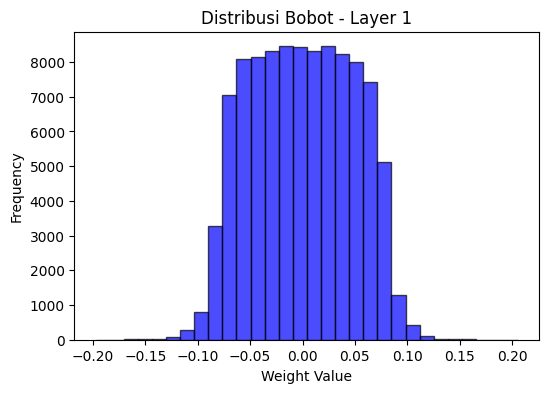

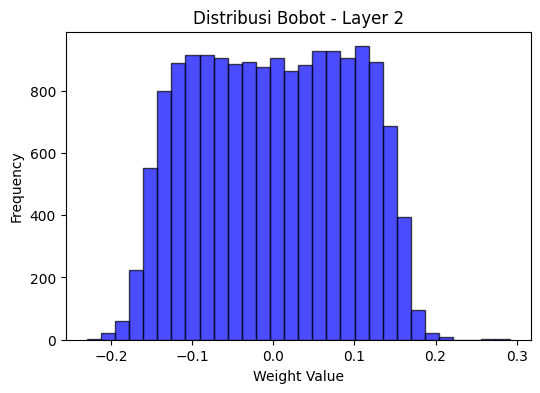

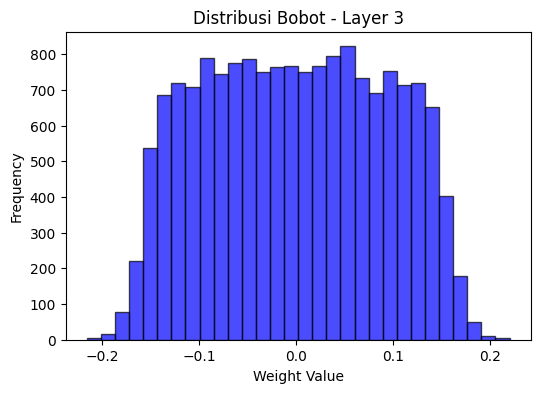

In [111]:
ann.visualize_weight_distribution((1,2,3))

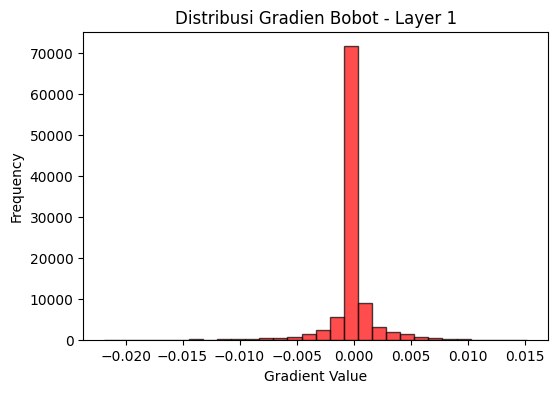

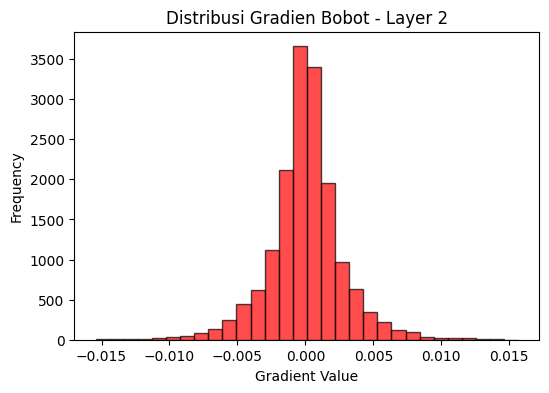

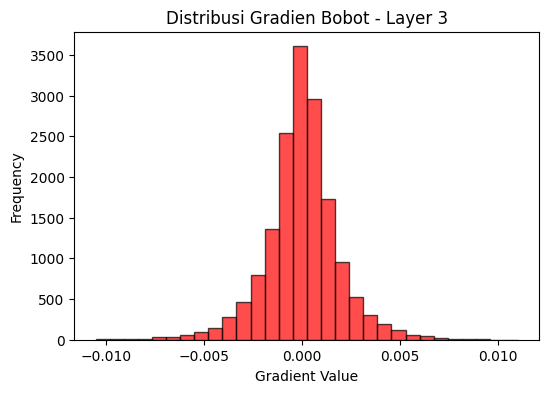

In [112]:
ann.visualize_gradient_distribution((1,2,3))

In [113]:
# Compare with MLP

from sklearn.neural_network import MLPClassifier

# Comparison with scikit-learn MLP (using ReLU instead of PReLU)
model = MLPClassifier(
    hidden_layer_sizes=(128, 128, 128, 128, 128),
    activation='tanh',
    solver='sgd',
    max_iter=20,
    batch_size=batch_size,
    random_state=123,
    verbose=True,
    learning_rate_init=0.01,
    learning_rate='constant',
    tol=0.0
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("F1 Score: ", f1_score(y_test, y_pred, average='macro'))

Iteration 1, loss = 0.31902645
Iteration 2, loss = 0.14478043
Iteration 3, loss = 0.10597684
Iteration 4, loss = 0.08302081
Iteration 5, loss = 0.06492869
Iteration 6, loss = 0.05416916
Iteration 7, loss = 0.04421797
Iteration 8, loss = 0.03745102
Iteration 9, loss = 0.03054358
Iteration 10, loss = 0.02470356
Iteration 11, loss = 0.02102427
Iteration 12, loss = 0.01715281
Iteration 13, loss = 0.01315105
Iteration 14, loss = 0.01105560
Iteration 15, loss = 0.00852507
Iteration 16, loss = 0.00687729
Iteration 17, loss = 0.00540345
Iteration 18, loss = 0.00402926
Iteration 19, loss = 0.00269943
Iteration 20, loss = 0.00219982


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


F1 Score:  0.9792651443089493
